In [29]:
import pandas as pd
energy_df=pd.read_csv('datos.csv', sep=';', usecols=['datetime','name','value'])
energy_df      

name      value  \
0              Demanda programada P48 total  20058.667   
1              Demanda programada P48 total  19237.725   
2              Demanda programada P48 total  18147.283   
3              Demanda programada P48 total  17038.350   
4              Demanda programada P48 total  16463.475   
...                                     ...        ...   
95845  Generación medida Turbinación bombeo    209.404   
95846  Generación medida Turbinación bombeo    453.843   
95847  Generación medida Turbinación bombeo    917.133   
95848  Generación medida Turbinación bombeo    927.008   
95849  Generación medida Turbinación bombeo   1401.872   

                        datetime  
0      2023-01-01T00:00:00+01:00  
1      2023-01-01T01:00:00+01:00  
2      2023-01-01T02:00:00+01:00  
3      2023-01-01T03:00:00+01:00  
4      2023-01-01T04:00:00+01:00  
...                          ...  
95845  2023-06-30T19:00:00+02:00  
95846  2023-06-30T20:00:00+02:00  
95847  2023-06-30T21:00:00+02:00  
95848  2023-06-30T22:00:00+02:00  
95849  2023-06-30T23:00:00+02:00  

[95850 rows x 3 columns]

In [30]:
demand_removed_df=energy_df[energy_df['name'].str.startswith('Demanda programada')==False]
demand_removed_df


name     value  \
39974              Generación medida Biogás    83.937   
39975              Generación medida Biogás    81.609   
39976              Generación medida Biogás    80.939   
39977              Generación medida Biogás    80.873   
39978              Generación medida Biogás    80.765   
...                                     ...       ...   
95845  Generación medida Turbinación bombeo   209.404   
95846  Generación medida Turbinación bombeo   453.843   
95847  Generación medida Turbinación bombeo   917.133   
95848  Generación medida Turbinación bombeo   927.008   
95849  Generación medida Turbinación bombeo  1401.872   

                        datetime  
39974  2023-01-01T00:00:00+01:00  
39975  2023-01-01T01:00:00+01:00  
39976  2023-01-01T02:00:00+01:00  
39977  2023-01-01T03:00:00+01:00  
39978  2023-01-01T04:00:00+01:00  
...                          ...  
95845  2023-06-30T19:00:00+02:00  
95846  2023-06-30T20:00:00+02:00  
95847  2023-06-30T21:00:00+02:00  
95848  2023-06-30T22:00:00+02:00  
95849  2023-06-30T23:00:00+02:00  

[55876 rows x 3 columns]

In [31]:
import plotly.express as px
#graph_df=demand_removed_df[demand_removed_df['datetime'].str.match('2023-01-01T')]
graph_df=demand_removed_df
demanda_df=graph_df[graph_df['name'].str.startswith('Demanda en consumo')]
demanda_df


name      value                   datetime
70375  Demanda en consumo  16742.660  2023-01-01T00:00:00+01:00
70376  Demanda en consumo  16204.409  2023-01-01T01:00:00+01:00
70377  Demanda en consumo  15222.482  2023-01-01T02:00:00+01:00
70378  Demanda en consumo  14354.542  2023-01-01T03:00:00+01:00
70379  Demanda en consumo  13792.577  2023-01-01T04:00:00+01:00
...                   ...        ...                        ...
74713  Demanda en consumo  27404.060  2023-06-30T19:00:00+02:00
74714  Demanda en consumo  27223.562  2023-06-30T20:00:00+02:00
74715  Demanda en consumo  26774.355  2023-06-30T21:00:00+02:00
74716  Demanda en consumo  25825.105  2023-06-30T22:00:00+02:00
74717  Demanda en consumo  24193.683  2023-06-30T23:00:00+02:00

[4343 rows x 3 columns]

In [32]:
generacion_df=graph_df[graph_df['name'].str.startswith('Demanda en consumo')==False]
generacion_df

name     value  \
39974              Generación medida Biogás    83.937   
39975              Generación medida Biogás    81.609   
39976              Generación medida Biogás    80.939   
39977              Generación medida Biogás    80.873   
39978              Generación medida Biogás    80.765   
...                                     ...       ...   
95845  Generación medida Turbinación bombeo   209.404   
95846  Generación medida Turbinación bombeo   453.843   
95847  Generación medida Turbinación bombeo   917.133   
95848  Generación medida Turbinación bombeo   927.008   
95849  Generación medida Turbinación bombeo  1401.872   

                        datetime  
39974  2023-01-01T00:00:00+01:00  
39975  2023-01-01T01:00:00+01:00  
39976  2023-01-01T02:00:00+01:00  
39977  2023-01-01T03:00:00+01:00  
39978  2023-01-01T04:00:00+01:00  
...                          ...  
95845  2023-06-30T19:00:00+02:00  
95846  2023-06-30T20:00:00+02:00  
95847  2023-06-30T21:00:00+02:00  
95848  2023-06-30T22:00:00+02:00  
95849  2023-06-30T23:00:00+02:00  

[51533 rows x 3 columns]

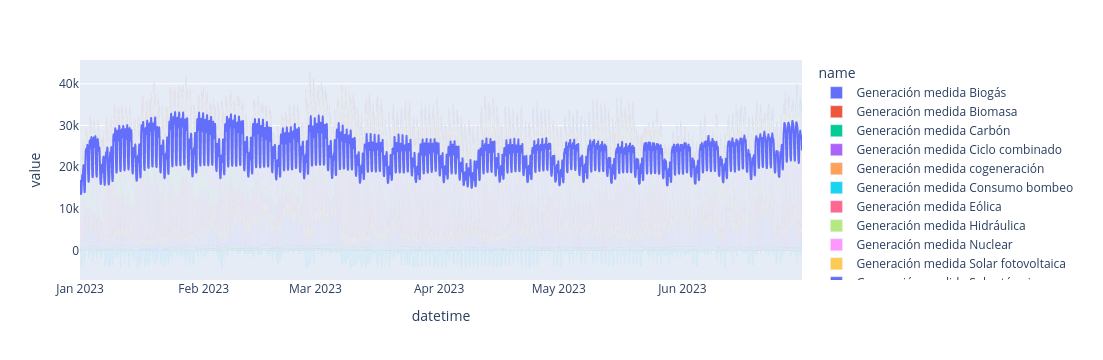

In [33]:
fig=px.bar(generacion_df, x='datetime', y='value', color='name')
fig.add_traces(list(px.line(demanda_df, x='datetime', y='value').select_traces()))
fig.show()